In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import proplot as pplt
from scipy.fftpack import * 
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### 用GMT中得到的点进行边界的连线
子图数量起来的话速度较慢

In [90]:
# Load the border data, CN-border-La.dat is download from
# https://gmt-china.org/data/CN-border-La.dat
import cartopy.crs as ccrs
cn_border_file = "/m2data2/yycheng/data_stage/CN-border/CN-border_line/CN-border-La.dat"
with open(cn_border_file) as src:
    context = src.read()
    blocks = [cnt for cnt in context.split('>') if len(cnt) > 0]
    borders = [np.fromstring(block, dtype=float, sep=' ') for block in blocks]


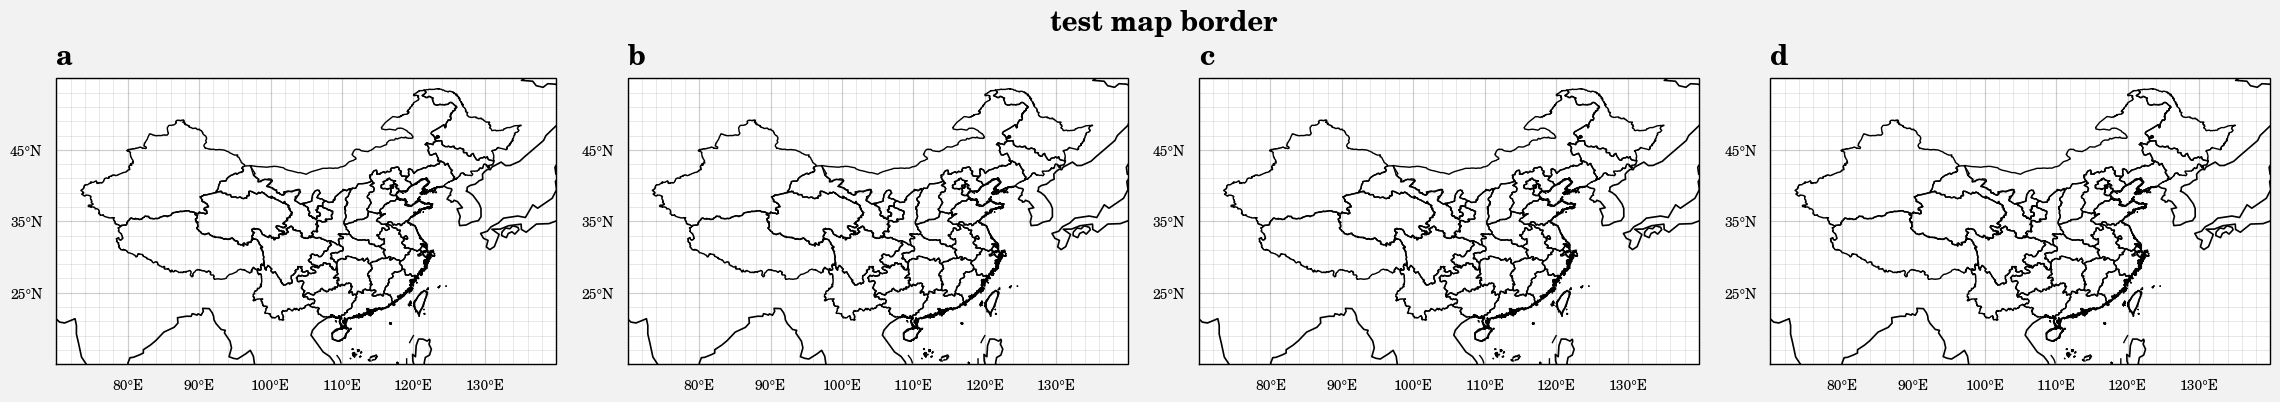

In [91]:
fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展
# ----- format setting -----

# for ax_ind in axs:
for line in borders:
    # axs.plot(line[0::100], line[1::100], lw = 0.5, color='gray',transform=ccrs.Geodetic())
    axs.plot(line[0::10], line[1::10], lw = 0.5, color='black',transform=ccrs.Geodetic())

    # ax_ind = axs[0]

axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
# reso = 'x-hi',
coast = True,
borders = False,
lakes = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

### 用shapefile解决问题

速度相比拉线显然更快

可以添加其他的shp file进行绘制

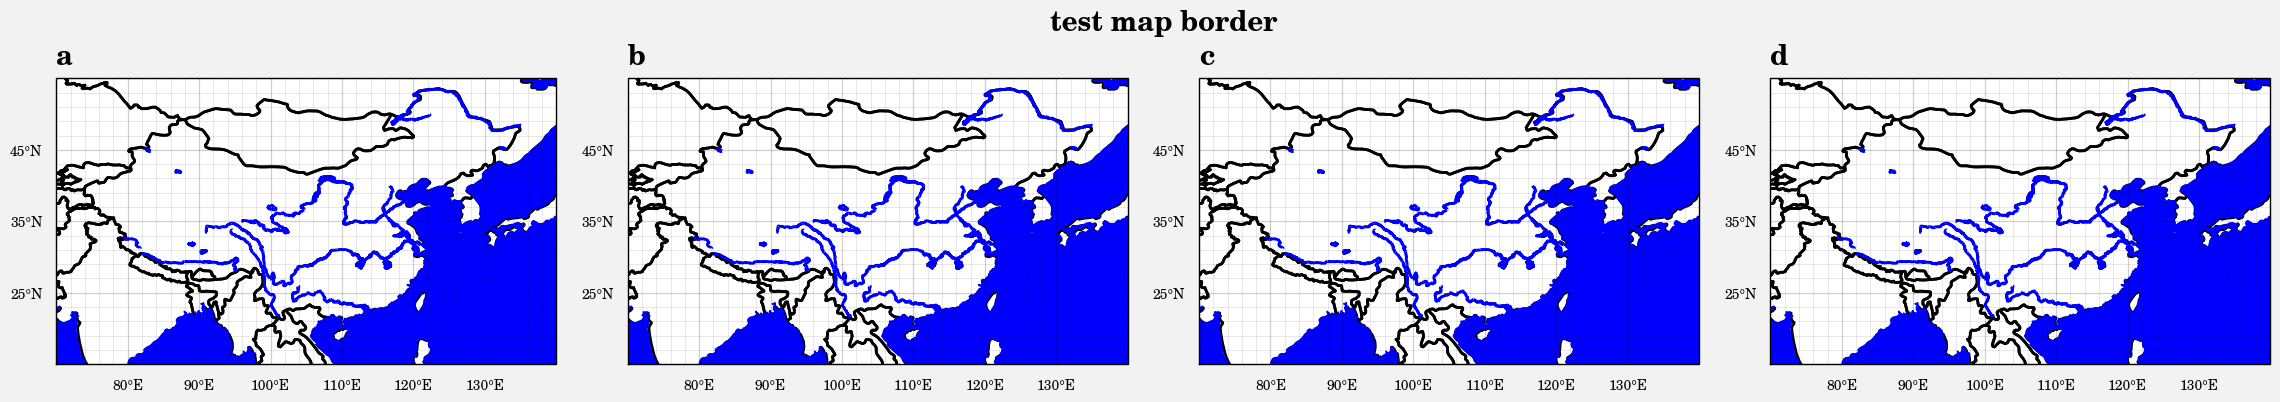

In [101]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
river_border_shapefile =  "/m2data2/yycheng/data_stage/CN-border/R1/" + "hyd1_4l.shp"

fig, axs = pplt.subplots(ncols=4,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展

for ax in axs:
    world = shpreader.Reader(world_border_shapefile).geometries()
    river = shpreader.Reader(river_border_shapefile).geometries()
    ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)
    ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='b'))

# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
reso = 'x-hi',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

## shapefile选取特定区域的部分进行绘制

想重叠上面两张图，在省份的基础上补齐九段线、省界之类的玩意

确实，去掉了中国，但是没有去掉中国的邻国，约等于没有去掉

2021.08.12

用了一个新的world行政区的数据（环资所）国界就能够与省界重合

将对国家的过滤改为从一级河流中只绘制长江黄河

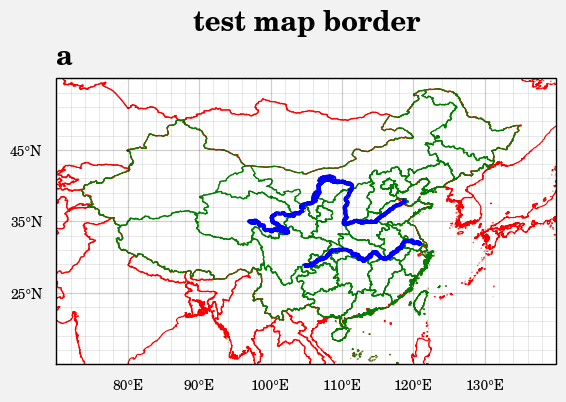

In [33]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axs = pplt.subplots(ncols=1,nrows=1, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展


    ## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/世界国家/世界国家.shp"
river_border_shapefile =  "/raid52/yycheng/MPAS/REFERENCE/MODEL_CONSTANT/R1/" + "hyd1_4l.shp"
province_2015_changeproj_shapefile    = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "change_proj_CN-sheng-A.shp"

world = shpreader.Reader(world_border_shapefile).geometries()
# world = shpreader.Reader(world_border_shapefile)#.geometries()
river = shpreader.Reader(river_border_shapefile, encoding = 'gbk')
province_2015_change_proj = shpreader.Reader(province_2015_changeproj_shapefile , encoding = 'UTF8').geometries() # 地资所的shp，需要转换proj单位
# Filter for a specific country， 一个一部到位的去除办法： 参考 https://techoverflow.net/2021/04/25/how-to-highlight-a-specific-country-using-cartopy/
# 去除掉 China，以免和直接连线相互重合
# world_remove_china = [country for country in reader.records() if ((country.attributes["NAME"] != "China") & (country.attributes["NAME"] != "Taiwan"))]

for ax in axs:
    # 绘制完整的shapefile
    # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='g', linewidth=0.4, zorder=1)
    ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=0.4, zorder=1)
    ax.add_geometries(province_2015_change_proj, ccrs.PlateCarree(), facecolor='none', edgecolor='g', linewidth=0.4, zorder=1)
    # 绘制部分的shapefile
    for region in river.records():
        if (region.attributes['NAME'] in ['黄河','长江']):
            # print("----- draw river! -----")
            # 此处需要使用 [] 让region.geometry可以迭代
            ax.add_geometries([region.geometry], ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1.4, zorder=1)


# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(15, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----
reso = 'x-hi',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(15,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(15,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)

## 从shapefile中补全其他部分

省份 + 南海诸岛

UTF8编码出现错误,使用沛沛那里的 bou2_4p.shp 包含了南海诸岛屿的绘制

## 使用shapefile直接读取可以很好解决编码错误

https://github.com/SciTools/cartopy/issues/1282 是一个关于utf8读入的issue需要进行下面对cartopy的修改

但是没法进行绘制，不是cartopy的类型

In [94]:
# UTF 8 编码问题解决办法，修改cartopy：修改位置
print(shpreader.__file__) 

/m2data2/yycheng/anaconda3/envs/proplot0528/lib/python3.8/site-packages/cartopy/io/shapereader.py


修改下面的内容，添加参数 **kwargs 传入需要的coding

In [95]:
class BasicReader(object):
    """
    Provide an interface for accessing the contents of a shapefile.
    The primary methods used on a Reader instance are
    :meth:`~Reader.records` and :meth:`~Reader.geometries`.
    """
    def __init__(self, filename, **kwargs):
        # Validate the filename/shapefile
        self._reader = reader = shapefile.Reader(filename, **kwargs)

class FionaReader(object):
    """
    Provides an interface for accessing the contents of a shapefile
    with the fiona library, which has a much faster reader than pyshp.
    The primary methods used on a Reader instance are
    :meth:`~Reader.records` and :meth:`~Reader.geometries`.
    """
    def __init__(self, filename, bbox=None, **kwargs):
        self._data = []

        with fiona.open(filename, **kwargs) as f:
            if bbox is not None:
                assert len(bbox) == 4
                features = f.filter(bbox=bbox)
            else:
                features = f

### projection转换单位为degree
在 shapefile的prj后缀文件中有shp文件使用的投影类型，如果最后的单位是meters而不是dergee，则需要进行一些转换才能够继续使用

参考 https://gis.stackexchange.com/questions/265589/change-shapefile-coordinate-system-using-python

转换使用的geopandas，有一个例子：

In [96]:
import geopandas
# province_2015_shapefile    = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "CN-sheng-A.shp"
province_shapefile    = "/m2data2/yycheng/data_stage/CN-border/Province/" + "province.shp"
data = geopandas.read_file(province_shapefile,encoding = 'gbk')
# change CRS to epsg 4326
data = data.to_crs(epsg=4326) # 选取epsg投影类型
# write shp file
# data.to_file("/m2data2/yycheng/data_stage/CN-border/CN-sheng/change_proj_CN-sheng-A.shp")
# data.to_file("/m2data2/yycheng/data_stage/CN-border/Province/change_proj_province.shp",encoding = 'gbk')

修改之后的绘图部分

罗列了下载到的诸多shp数据

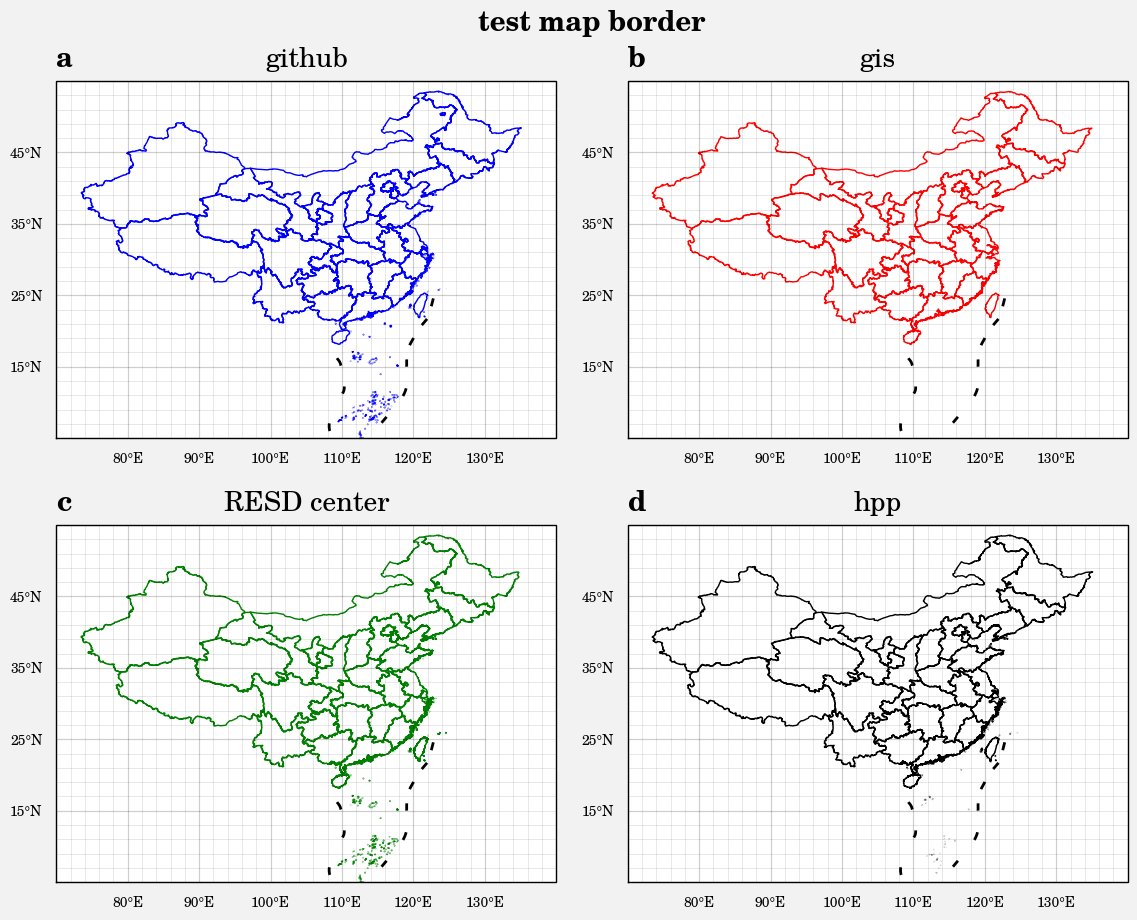

In [97]:
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axs = pplt.subplots(ncols=2,nrows=2, proj=('cyl'))
plt.style.use(['science', 'no-latex']) # 采用 安装的scinence绘图风格，matplotlib风格拓展

## shapefile数据下载的位置：
## http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
# 世界行政区划
world_border_shapefile = "/m2data2/yycheng/data_stage/CN-border/World/country.shp"
# 一级河流
river_border_shapefile =  "/m2data2/yycheng/data_stage/CN-border/R1/" + "hyd1_4l.shp"
# 南海九段线
ninelines_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "nine_lines.shp"
# 南海诸岛
island_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "southsea_island.shp"
# 诸岛
bou24l_shapefile     = "/m2data2/yycheng/data_stage/CN-border/SouthSea/" + "bou2_4l.shp"


# 各个省份
## 来源： http://gaohr.win/site/blogs/2017/2017-04-18-GIS-basic-data-of-China.html
province_gis_shapefile    = "/m2data2/yycheng/data_stage/CN-border/Province/" + "change_proj_province.shp" # meters，未修改单位到degree
# 来源： https://github.com/davewow/data_boundary
province_github_shapefile    = "/m2data2/yycheng/data_stage/CN-border/中国各级行政区边界（shp格式）/" + "行政边界_省级.shp"
# 来源： https://www.resdc.cn/data.aspx?DATAID=200
province_2015_shapefile    = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "CN-sheng-A.shp" # 并没有修改单位
province_2015_changeproj_shapefile    = "/m2data2/yycheng/data_stage/CN-border/CN-sheng/" + "change_proj_CN-sheng-A.shp"
# 来源： 沛沛的诸省 + 诸岛
province_hpp_shapefile     = "/m2data2/yycheng/data_stage/CN-border/peipeihelp/" + "bou2_4p.shp"


# 绘制共同的部分
for ax in axs:
    # world     = shpreader.Reader(world_border_shapefile).geometries()
    # river     = shpreader.Reader(river_border_shapefile, encoding = 'utf8').geometries()
    ninelines  = shpreader.Reader(ninelines_shapefile, encoding = 'utf8').geometries()
    # island = shpreader.Reader(island_shapefile).geometries()
    # bou24l = shpreader.Reader(bou24l_shapefile).geometries()

    # ax.add_geometries(world, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=1, zorder=1)
    # ax.add_geometries(river, ccrs.PlateCarree(), facecolor='none', edgecolor='g', linewidth=1, zorder=1)
    # ax.add_geometries(island, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    ax.add_geometries(ninelines, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=1, zorder=1)
    # ax.add_geometries(bou24l, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=1, zorder=1)
    # ax.add_geometries(bou24p, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=0.5, zorder=1)
    # ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', facecolor='b'))

# 单独绘制各个子图

province_github = shpreader.Reader(province_github_shapefile, encoding = 'utf8').geometries() # 来自github的shp
province_gis    = shpreader.Reader(province_gis_shapefile, encoding = 'gbk').geometries() # 沛沛的shp
province_2015_change_proj = shpreader.Reader(province_2015_changeproj_shapefile , encoding = 'UTF8').geometries() # 地资所的shp，需要转换proj单位
province_hpp = shpreader.Reader(province_hpp_shapefile , encoding = 'UTF8').geometries() # 地资所的shp，需要转换proj单位

axs[0].format(title = 'github')
axs[0].add_geometries(province_github, ccrs.PlateCarree(), facecolor='none', edgecolor='b', linewidth=0.5, zorder=1)
axs[1].format(title = 'gis')
axs[1].add_geometries(province_gis, ccrs.PlateCarree(), facecolor='none', edgecolor='r', linewidth=0.5, zorder=1)
axs[2].format(title = 'RESD center')
axs[2].add_geometries(province_2015_change_proj, ccrs.PlateCarree(), facecolor='none', edgecolor='g', linewidth=0.5, zorder=1)
axs[3].format(title = 'hpp')
axs[3].add_geometries(province_hpp, ccrs.PlateCarree(), facecolor='none', edgecolor='k', linewidth=0.5, zorder=1)



# ----- format setting -----
axs.format(
abc=True,
lonlim=(70, 140), latlim=(5, 55),
# lonlim=(60, 100), latlim=(10, 40),
#----- 地图底图设置 -----s
reso = 'med',
coast = False,
borders = False,
lakes = False,
ocean = False,
#-----GEO axis-----
labels = True,
gridlabelsize = 5,
gridminor = True,
# ticklen = 10,
# borderslinewidth=.5,
# longridminor= False,
# latgridminor= False,
# lonminorlocator = 
longrid  = True,
latgrid  = True,
# latlines = 10,
# lonlines = 10,
lonlocator = np.arange(70,140,10),
latlocator = np.arange(5,65,10),
lonminorlocator = np.arange(70,140+2,2),
latminorlocator = np.arange(5,55+2,2),
#-----line label-----
# linewidth = 0.5,
# suptitle="3000km-2000km bandpass 500hPa height(1998-06 timemean)",
suptitle="test map border",
)